In [1]:
import celldancer as cd
import anndata
import pandas as pd
import numpy as np
import scipy as sp
import os

In [2]:
adata = anndata.read_h5ad('../data/mouse_brain.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4628 × 117
    obs: 'n_counts', 'Region', 'Subclass', 'leiden', 'velocity_self_transition'
    var: 'GeneName', 'mean', 'std', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_xy_loc', 'velocity_xy_loc', 'xy_loc'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [4]:
df = cd.adata_to_df_with_embed(adata,
                               cell_type_para='Region',
                               embed_para='X_xy_loc')

100%|█████████████████████████████████████████| 117/117 [00:02<00:00, 43.62it/s]


In [5]:
df_loss , df = cd.velocity(df)

Using /Users/cliffzhou/Documents/GitHub/scTT/example_notebooks/cellDancer_velocity_2023-07-22 23-35-32 as the output path.
Arranging genes for parallel job.
117  genes were arranged to  15  portions.



Velocity Estimation: 100%|██████████| 15/15 [01:39<00:00,  5.40s/it]            
                                                                                Not predicted gene list:['Fgf3', 'Fzd10', 'Fzd8', 'Hoxb2', 'Mafb', 'Olig3', 'Pou3f1']. Try visualizing the unspliced and spliced columns of the gene(s) to check the quality.


In [6]:
df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Hoxb1,0.000000,0.000000,10.897029,0.000000,1.247404,11.13904,12.403588,0.295515,1009,Forebrain,106.5,121.5
1,1,Hoxb1,0.000000,0.000000,10.897029,0.000000,1.247404,11.13904,12.403588,0.295515,1010,Forebrain,107.5,121.5
2,2,Hoxb1,0.000000,0.000000,10.897029,0.000000,1.247404,11.13904,12.403588,0.295515,1011,Forebrain,108.5,121.5
3,3,Hoxb1,0.000000,0.906981,10.874463,0.902404,1.244821,11.14041,12.405129,0.295515,1012,Forebrain,111.5,121.5
4,4,Hoxb1,0.000000,0.000000,10.897029,0.000000,1.247404,11.13904,12.403588,0.295515,1013,Forebrain,112.5,121.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509075,4623,Cnpy1,3.210938,6.850010,30132.460000,7.229386,159.255370,202.33473,217.518340,0.125999,935,Forebrain,125.5,120.5
509076,4624,Cnpy1,2.837795,7.965861,29984.959000,7.987523,158.477190,202.38420,217.548920,0.125999,936,Forebrain,126.5,120.5
509077,4625,Cnpy1,1.366751,0.701493,30031.660000,1.226319,158.729740,202.31267,217.472380,0.125999,937,Forebrain,127.5,120.5
509078,4626,Cnpy1,0.000000,0.000000,29750.957000,0.000000,157.251340,202.38425,217.503280,0.125999,938,Forebrain,128.5,120.5


In [7]:
df = cd.compute_cell_velocity(df)

In [8]:
df.clusters

0         Forebrain
1         Forebrain
2         Forebrain
3         Forebrain
4         Forebrain
            ...    
509075    Forebrain
509076    Forebrain
509077    Forebrain
509078    Forebrain
509079    Hindbrain
Name: clusters, Length: 509080, dtype: category
Categories (3, object): ['Forebrain', 'Hindbrain', 'Midbrain']

NameError: name 'cd' is not defined

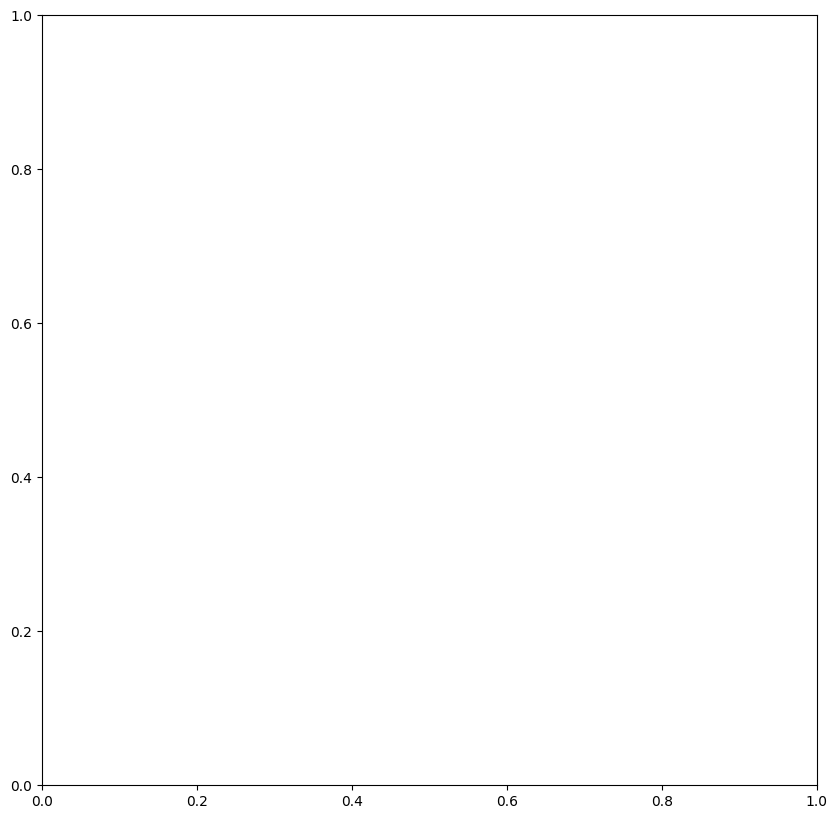

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
im = cd.cdplt.scatter_cell(ax,
                        df, 
                        colors=['Forebrain', 'Hindbrain', 'Midbrain'], 
                        alpha=0.2, 
                        s=70,
                        velocity=True,
                        legend = 'on',
                        min_mass = 2,
                        arrow_grid = (20,20))
ax.axis('off')
plt.show()

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


ModuleNotFoundError: No module named 'igraph'